In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
matplotlib.rc('font', size=18)
from tqdm.notebook import tqdm

import sys
sys.path.append('../')
import general_purpose.utilities as ut
import general_purpose.uplotlib as uplt

from importlib import reload

import reconstruct as rec
import dw

In [14]:
%%time
dw.sigma = 0.8
traj = dw.run(10000)

CPU times: user 61.3 ms, sys: 197 µs, total: 61.5 ms
Wall time: 65.2 ms


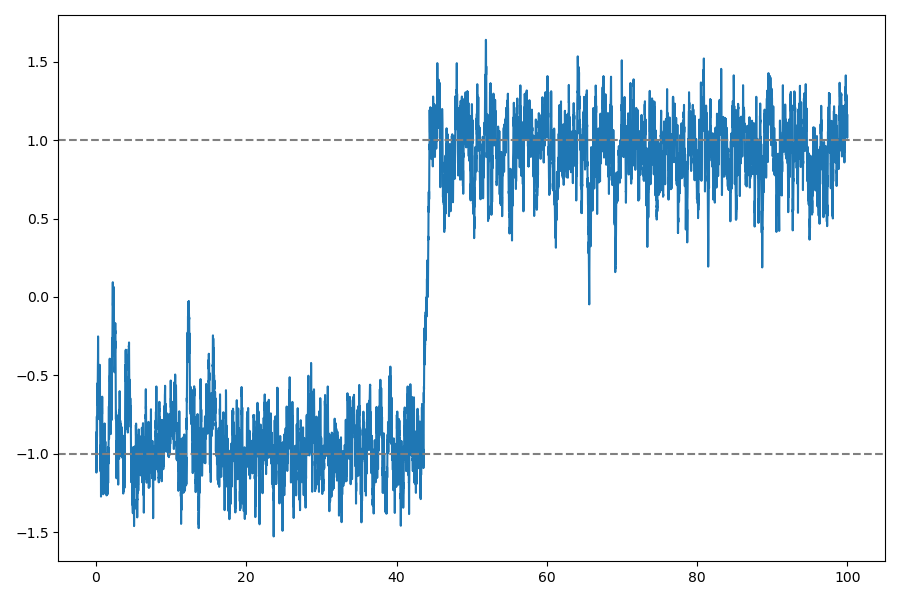

In [15]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(traj[:,0], traj[:,1])

plt.axhline(-1, color='gray', linestyle='dashed')
plt.axhline(1, color='gray', linestyle='dashed')

fig.tight_layout()

In [58]:
# folder = '__test__/dw_c0--k__0--nens__1000--T__10'
folder = '__test__/dw_f0--k__2--nens__1000--T__10'
# folder = '__test__/dw_f0--k__4--nens__1000--T__10'
rec_dict = ut.json2dict(f'{folder}/reconstructed.json')

In [59]:
rec_trajs = {}

for rname, r in tqdm(rec_dict['members'].items()):
    traj = []
    for subfolder,e in zip(rec_dict['folders'], r['ancestry']):
        traj.append(np.load(f'{folder}/{subfolder}/{e}-traj.npy'))
    traj = np.concatenate(traj)

    rec_trajs[rname] = traj

observables = {r: traj[-1,1] for r,traj in rec_trajs.items()}

  0%|          | 0/1000 [00:00<?, ?it/s]

In [60]:
## get the killed trajectories

nens = len(rec_dict['members'])
enss = set([f'e{i+1:0{len(str(nens))}d}' for i in range(nens)])

killed_trajs = []
for i,f in tqdm(enumerate(rec_dict['folders'])):
    kens = enss - set([r['ancestry'][i] for r in rec_dict['members'].values()])
    killed_trajs.append({ke: np.load(f'{folder}/{f}/{ke}-traj.npy') for ke in kens})

0it [00:00, ?it/s]

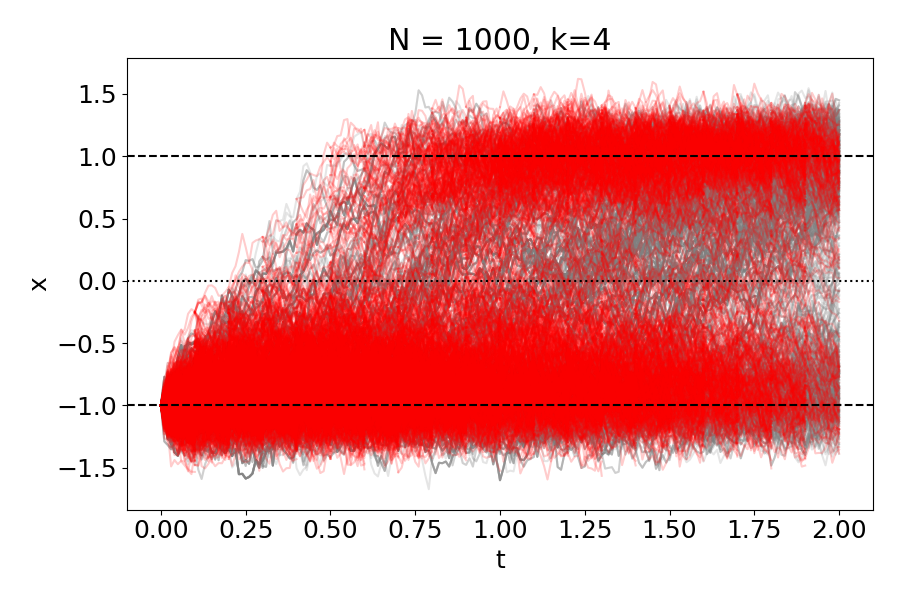

In [61]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

for traj in rec_trajs.values():
    plt.plot(traj[:,0], traj[:,1], color='gray', alpha=0.2)
    
for seg in killed_trajs:
    for traj in seg.values():
        plt.plot(traj[:,0], traj[:,1], color='red', alpha=0.2)
    
plt.axhline(0, color='black', linestyle='dotted')
plt.axhline(-1, color='black', linestyle='dashed')
plt.axhline(1, color='black', linestyle='dashed')

plt.xlabel('t')
plt.ylabel('x')
plt.title('N = 1000, k=4')

fig.tight_layout()

In [8]:
def cummax(arr):
    cm = np.zeros_like(arr)
    
    for i,a in enumerate(arr):
        if i == 0:
            cm[0] = arr[0]
        else:
            cm[i] = max(cm[i-1], arr[i])
    return cm

In [31]:
cm_trajs = {r: np.vstack([traj[:,0], cummax(traj[:,1])]).T for r,traj in tqdm(rec_trajs.items())}

  0%|          | 0/1000 [00:00<?, ?it/s]

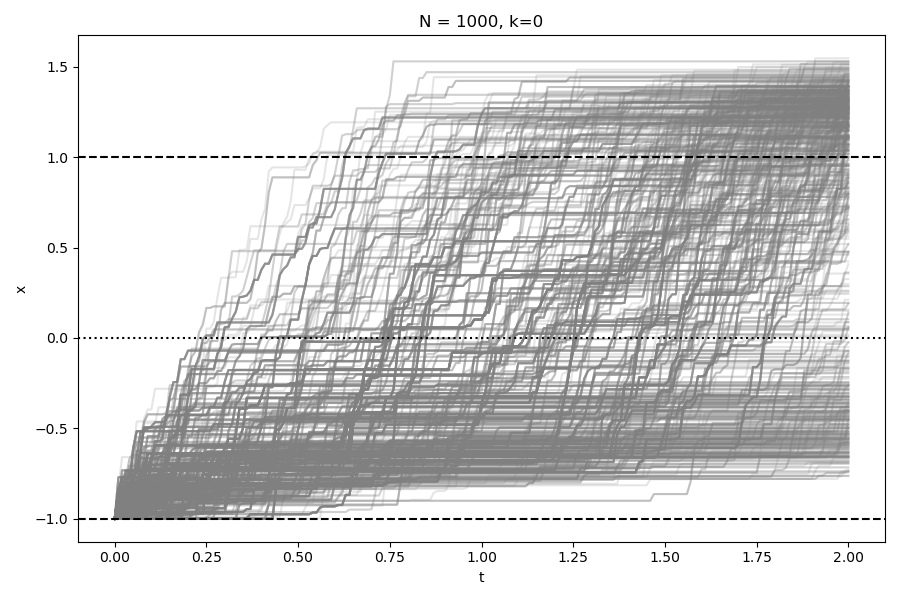

In [32]:
plt.close(2)
fig, ax = plt.subplots(num=2, figsize=(9,6))

for traj in cm_trajs.values():
    plt.plot(traj[:,0], traj[:,1], color='gray', alpha=0.2)
    
plt.axhline(0, color='black', linestyle='dotted')
plt.axhline(-1, color='black', linestyle='dashed')
plt.axhline(1, color='black', linestyle='dashed')

plt.xlabel('t')
plt.ylabel('x')
plt.title('N = 1000, k=0')

fig.tight_layout()

In [26]:
thr = 0.

ts = rec_trajs['r0001'][:,0]

x_traj = np.vstack([traj[:,1] for traj in rec_trajs.values()])
cm_x_traj = np.vstack([traj[:,1] for traj in cm_trajs.values()])

probs = uplt.avg(x_traj > thr, mean_std=True, axis=0)
cm_probs = uplt.avg(cm_x_traj > thr, mean_std=True, axis=0)

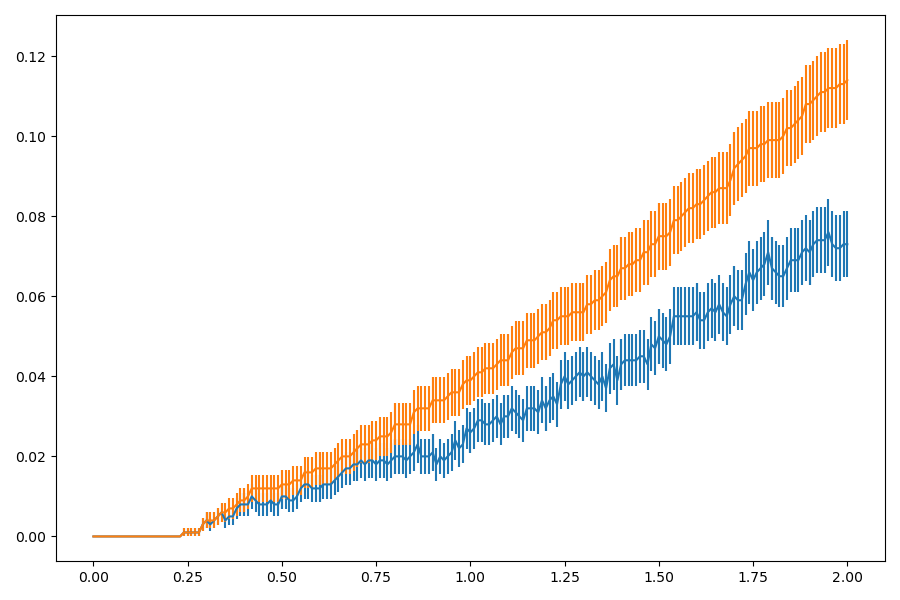

In [27]:
plt.close(3)
fig, ax = plt.subplots(num=3, figsize=(9,6))

uplt.plot(ts, probs)
uplt.plot(ts, cm_probs)

fig.tight_layout()